# Edge Gradient Filter
Notebook to demonstrate the use of the grad_filter

In [145]:
import sys
from pathlib import Path
import pickle

import cv2
import numpy as np
from rich import progress
import matplotlib.pyplot as plt

# add safas to PATH
sys.path.append(str(Path().absolute().parents[1])) 
# load an image from safas data module
from safas import data

src = data.brightmudflocs()
src = src[400:1000, 400:1000, :] #crop 


In [148]:
from safas.labelers.edge_gradient import labeler 

dir(labeler)

['Path',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'cal_grad_img',
 'cv2',
 'fill_coords',
 'format_output_objects',
 'labeler',
 'labels_to_coords',
 'np',
 'objs_on_edge',
 'params',
 'path',
 'print',
 'setup',
 'sys']

In [149]:
# process using two different parameter sets
params = dict(thresh_inv=True,
            thresh_val=120,
            apply_grad_filter=True,
            grad_thresh_val=80,
            apply_min_px_filter=True,
            area_min_px=5)

objs_1 = labeler.labeler(src, **params)
title_1 = f"{len(objs_1)} objs, thresh_val {params['thresh_val']}, grad_thresh_val {params['grad_thresh_val']}"
print(title_1)

params = dict(thresh_inv=True,
            thresh_val=190,
            apply_grad_filter=True,
            grad_thresh_val=5,
            apply_min_px_filter=True,
            area_min_px=0)
        
objs_2 = labeler.labeler(src, **params)
title_2 = f"{len(objs_2)} objs, thresh_val {params['thresh_val']}, grad_thresh_val {params['grad_thresh_val']}"
print(title_2)

9 objs, thresh_val 120, grad_thresh_val 80
18 objs, thresh_val 190, grad_thresh_val 5


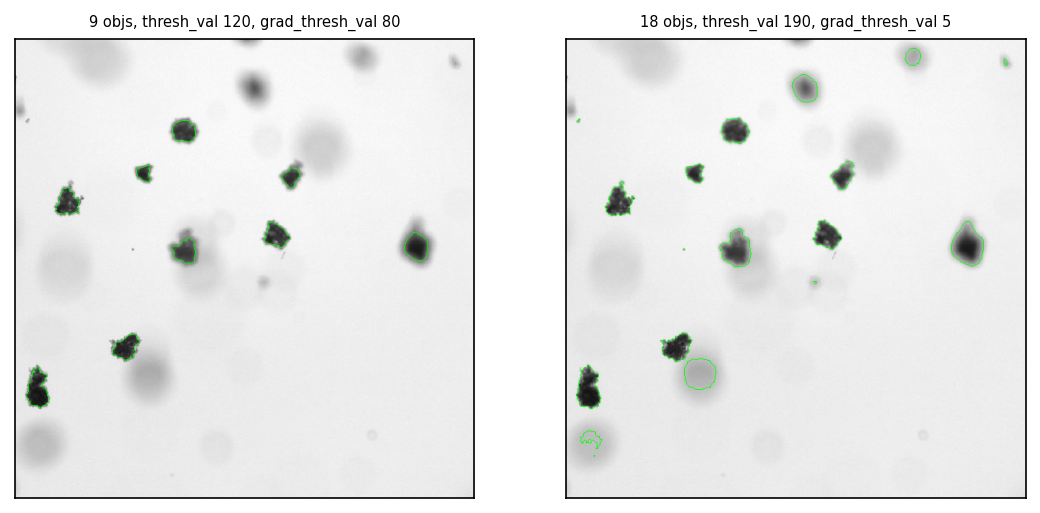

In [150]:
f, ax  = plt.subplots(1,2, dpi=150, figsize=(7.5, 3.5))

for a in ax: 
    a.set_xticks([])
    a.set_yticks([])

def add_cv_contours(out, objs): 
    for obj_idx in list(objs): 
        pts = objs[obj_idx]["obj_contour_cv"] 
        out = cv2.drawContours(out, pts, -1, (0,255,0), 1) 
    return out

out_1 = add_cv_contours(src.copy(), objs_1)
out_2 = add_cv_contours(src.copy(), objs_2)

ax[0].imshow(out_1)
ax[0].set_title(title_1, fontsize=7)
ax[1].imshow(out_2)
ax[1].set_title(title_2, fontsize=7)
plt.tight_layout()

plt.savefig('filter_ex.png', dpi=150, facecolor="w")